In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import tempfile
import os
from timeit import default_timer as timer
from tempfile import TemporaryFile
import decimal
from decimal import *
from numpy import loadtxt
import pickle
from scipy.stats import skew
from scipy.stats import kurtosis


In [3]:
#Readout of GP_analysis metrics

In [4]:
#Reading exported datasets for representative statist. analysis

In [5]:
P22_path = 'D://Arbeit//GP_Metriken_und_Daten//P22_test.pkl'
P22_sm_path = 'D://Arbeit//GP_Metriken_und_Daten//P22_val_SMALL.pkl'

P17_path = 'D:/Arbeit/GP_Metriken_und_Daten/P17_test.pkl'
P17_sm_path = 'D:/Arbeit/GP_Metriken_und_Daten/P17_val_SMALL.pkl'

P19_path = 'D:/Arbeit/GP_Metriken_und_Daten/P19_test.pkl'
P19_sm_path = 'D:/Arbeit/GP_Metriken_und_Daten/P19_val_SMALL.pkl'

P109_path = 'D:/Arbeit/GP_Metriken_und_Daten/P109_test-004.pkl'
P109_sm_path = 'D:/Arbeit/GP_Metriken_und_Daten/P109_val_SMALL.pkl'


In [6]:
P_22 = pickle.load(open(P22_path, 'rb'))

In [60]:
def divider(DF):
    
    zero = DF[DF['aSyn_fluo'] == 0]
    one = DF[DF['aSyn_fluo'] == 1]
    
    return(zero, one)

In [8]:
P_22

,HFR 1,HFR 2,HFR 3,HFR 4,HFR 5,HFR 6,HFR 7,HFR 8,HFR 9,HFR 10,...,FP 28,FP 29,FP 30,FP 31,FP 32,FP 33,FP 34,FP 35,FP 36,aSyn_fluo
7306840,0.014464,0.011131,0.021131,0.003333,0.006667,0.014464,0.006667,0.017798,0.010000,0.006667,...,0.021131,0.003333,0.715400,0.017798,0.017798,0.028929,0.715400,0.017798,0.715400,0.0
3034627,0.024464,0.028929,0.006667,0.000000,0.003333,0.021131,0.028929,0.006667,0.025595,0.032262,...,0.014464,0.003333,0.003333,0.028929,0.017798,0.006667,0.003333,0.014464,0.000000,0.0
6444208,0.715400,0.715400,0.715400,0.715400,0.000000,0.006667,0.014464,0.003333,0.003333,0.021131,...,0.715400,0.715400,0.715400,0.003333,0.715400,0.715400,0.715400,0.715400,0.715400,0.0
8086433,0.003333,0.715400,0.014464,0.003333,0.715400,0.017798,0.715400,0.006667,0.006667,0.003333,...,0.715400,0.006667,0.006667,0.017798,0.014464,0.021131,0.003333,0.003333,0.006667,0.0
4347408,0.021131,0.011131,0.017798,0.025595,0.035595,0.067948,0.085746,0.131523,0.128190,0.134856,...,0.160543,0.128190,0.110301,0.089079,0.089079,0.103635,0.106968,0.110301,0.075746,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012990,0.025595,0.021131,0.024464,0.032262,0.043393,0.079079,0.050060,0.128190,0.106968,0.113635,...,0.178431,0.163876,0.131523,0.113635,0.113635,0.106968,0.131523,0.138190,0.110301,0.0
9043857,0.028929,0.028929,0.035595,0.046726,0.050060,0.103635,0.138190,0.167209,0.181765,0.235431,...,0.199653,0.217542,0.253319,0.181765,0.134856,0.185098,0.199653,0.156078,0.167209,0.0
8643475,0.038929,0.021131,0.038929,0.067948,0.050060,0.082413,0.103635,0.138190,0.156078,0.163876,...,0.163876,0.185098,0.134856,0.160543,0.106968,0.141523,0.141523,0.163876,0.134856,0.0
373344,0.035595,0.028929,0.038929,0.046726,0.071282,0.128190,0.131523,0.181765,0.202987,0.238764,...,0.530111,0.469537,0.466204,0.454982,0.351873,0.326096,0.366428,0.311540,0.311540,0.0


In [11]:
skew(P_22.iloc[:, 0:69])

array([2.48047235, 2.60229497, 2.97405223, 2.98978   , 3.08133159,
       3.15951131, 3.07008873, 2.75673367, 2.45393551, 2.25966213,
       1.86051507, 1.30350849, 0.749729  , 0.79042419, 0.98991152,
       1.48259499, 1.89155267, 2.0896988 , 2.18975227, 2.32307673,
       2.28230564, 2.32011885, 2.51202182, 2.38039478, 2.16958957,
       2.25921521, 2.11034976, 1.8648793 , 1.66365746, 1.5144653 ,
       1.54530581, 1.48237847, 1.50608723, 1.43741705, 1.50598907,
       1.57017043, 1.58060933, 1.59684084, 1.72214529, 1.72475995,
       1.65380329, 1.66944091, 1.57363532, 1.59475649, 1.63358721,
       1.71860201, 1.7271028 , 1.81239303, 1.74140808, 1.60768535,
       1.58079637, 1.49949302, 1.43090086, 1.4340116 , 1.47531067,
       1.42647367, 1.59151418, 1.7036956 , 1.66451913, 1.66270356,
       1.64060311, 1.64717882, 1.59377532, 1.67162021, 1.65846894,
       1.57124614, 1.58627014, 1.60413327, 1.56292886])

In [13]:
kurtosis(P_22.iloc[:, 0:69])

array([ 4.18074154,  4.80576807,  6.90667077,  7.05232911,  7.8005098 ,
        8.62495096,  8.58761112,  7.1390914 ,  5.75163899,  5.10462203,
        3.26147082,  1.0848489 , -0.65032621, -0.5439669 ,  0.03468064,
        1.56790127,  2.74470455,  3.39705458,  3.74334452,  4.50676861,
        4.28574214,  4.28133699,  5.04247603,  4.19494472,  3.08362991,
        3.34358683,  2.51184527,  1.49822946,  0.77956317,  0.3021165 ,
        0.39616042,  0.20479619,  0.27571142,  0.26202823,  0.49176911,
        0.70840506,  0.72748995,  0.78427258,  1.23776654,  1.25553249,
        0.97849431,  1.03750881,  0.68577912,  0.7637374 ,  0.90361229,
        1.25827895,  1.38225332,  1.89609167,  1.81001992,  1.35954506,
        1.38999269,  1.12256153,  0.9776171 ,  1.04588575,  1.30914471,
        1.024115  ,  1.5617643 ,  1.86884852,  1.57276554,  1.43180363,
        1.27881456,  1.14089038,  0.89649951,  1.14574517,  1.05432869,
        0.74027027,  0.78410766,  0.81826406,  0.67115008])

In [14]:
P_22.shape

(943708, 70)

In [75]:
def Skew_Kurt_printer(path, path_sm):
    
    DF = pickle.load(open(path, 'rb'))
    DF_sm = pickle.load(open(path_sm, 'rb'))
    
    f=15
    
    
    features = (DF.shape[1]-1)
    x_axis = np.arange(features)
    
    skews = skew(DF.iloc[:, 0:features], nan_policy='omit')
    kurts = kurtosis(DF.iloc[:, 0:features], nan_policy='omit')
    
    skews_sm = skew(DF_sm.iloc[:, 0:features], nan_policy='omit')
    kurts_sm = kurtosis(DF_sm.iloc[:, 0:features], nan_policy='omit')
    
    fig, ((ax1, ax3),(ax2, ax4)) = plt.subplots(2, 2, figsize=(20,8))
    
    ax1.scatter(x_axis, skews)
    ax1.plot(x_axis, np.linspace(0.0, 0.0, features), zorder=10, color = 'red')
    ax2.scatter(x_axis, kurts)
    ax2.plot(x_axis, np.linspace(3.0, 3.0, features), zorder=10, color = 'orange')
    
    ax3.scatter(x_axis, skews_sm)
    ax3.plot(x_axis, np.linspace(0.0, 0.0, features), zorder=10, color = 'red')
    ax4.scatter(x_axis, kurts_sm)
    ax4.plot(x_axis, np.linspace(3.0, 3.0, features), zorder=10, color = 'orange')
    
    ax1.set_xlabel('Wavenumber', fontsize=f)
    ax2.set_xlabel('Wavenumber', fontsize=f)
    ax3.set_xlabel('Wavenumber', fontsize=f)
    ax4.set_xlabel('Wavenumber', fontsize=f)
    
    ax1.set_ylabel('Skewness', fontsize=f)
    ax2.set_ylabel('Kurtosis', fontsize=f)
    ax3.set_ylabel('Skewness', fontsize=f)
    ax4.set_ylabel('Kurtosis', fontsize=f)
    
    ax1.set_title('Naive dataset', fontsize=f)
    ax3.set_title('Small dataset', fontsize=f)
    
    ax1.set_ylim(-1, (np.append(skews,skews_sm))[np.argmax((np.append(skews,skews_sm)))])
    ax3.set_ylim(-1, (np.append(skews,skews_sm))[np.argmax((np.append(skews,skews_sm)))])
    
    ax2.set_ylim(-1, (np.append(kurts,kurts_sm))[np.argmax((np.append(kurts,kurts_sm)))])
    ax4.set_ylim(-1, (np.append(kurts,kurts_sm))[np.argmax((np.append(kurts,kurts_sm)))])
    

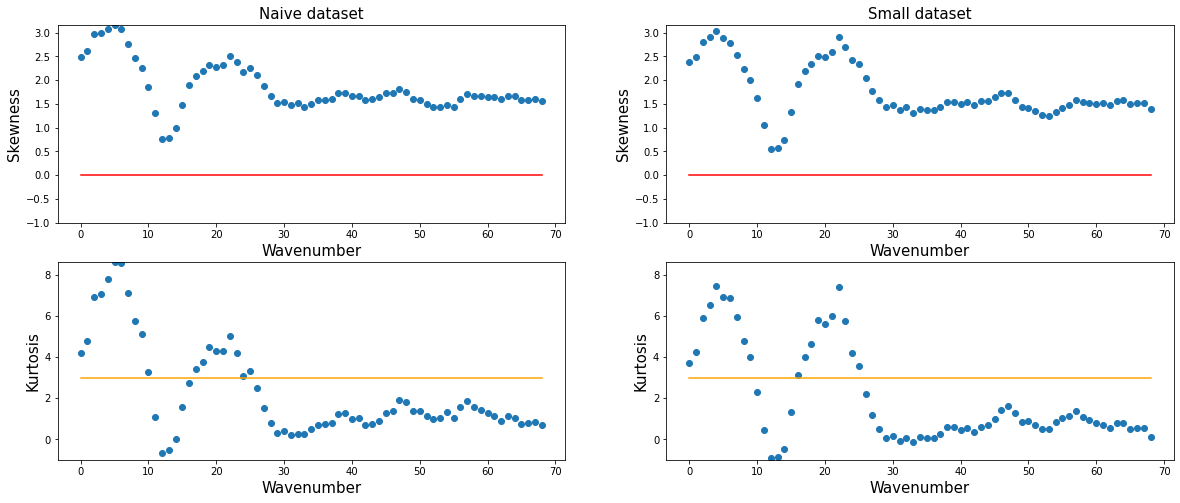

In [76]:
P22_skew_kurt = Skew_Kurt_printer(P22_path, P22_sm_path)

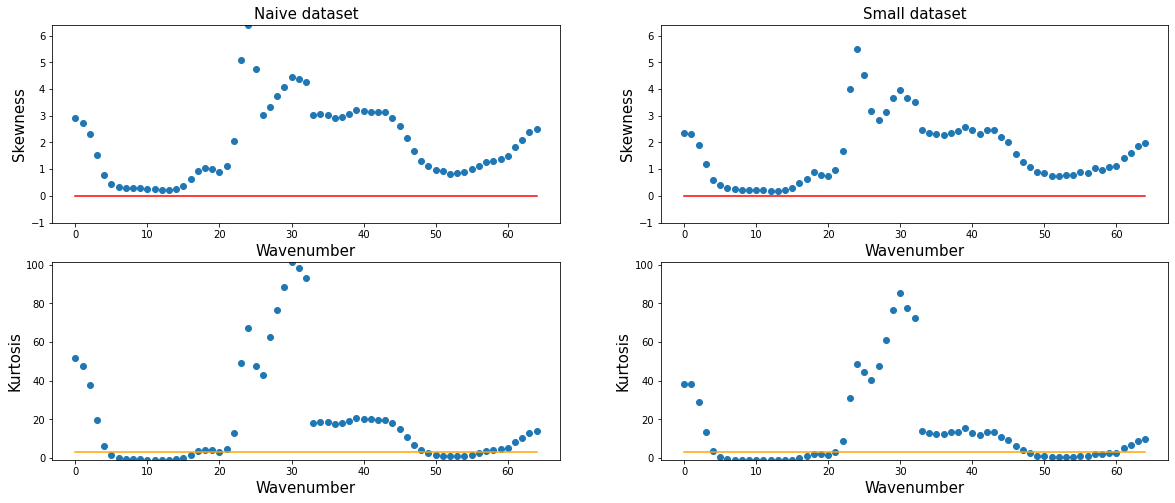

In [77]:
P17_skew_kurt = Skew_Kurt_printer(P17_path, P17_sm_path)

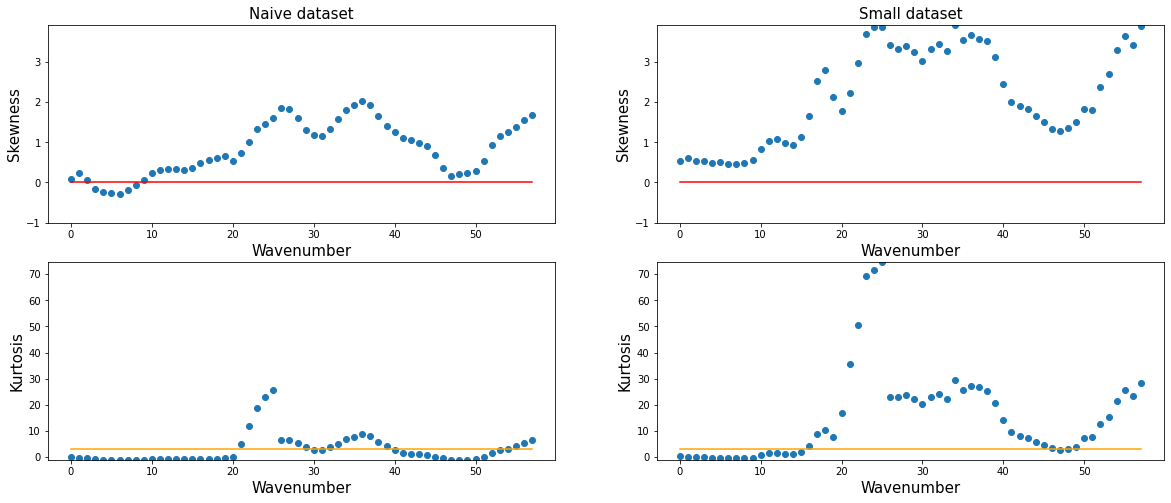

In [78]:
P19_skew_kurt = Skew_Kurt_printer(P19_path, P19_sm_path)

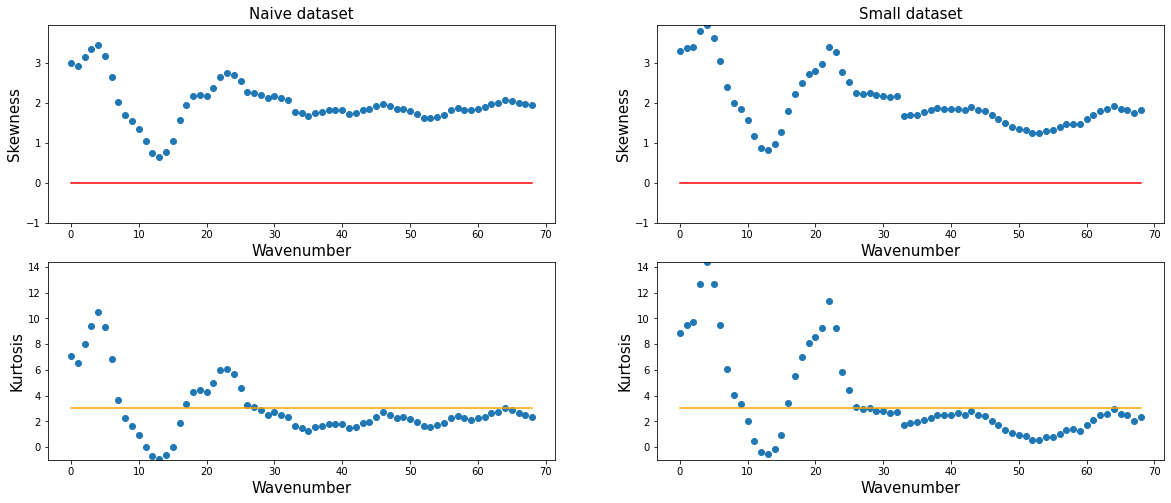

In [79]:
P109_skew_kurt = Skew_Kurt_printer(P109_path, P109_sm_path)

In [ ]:
def statprint(stat, stat_sm):
    
    %matplotlib inline
    
    x_axis = np.arange(stat.shape[1])
    x_axis_line = np.linspace(-5, stat.shape[1], stat.shape[1])
    fig, ((ax1),(ax2)) = plt.subplots(1, 2, figsize=(16,4))
    
    ax1.scatter(x_axis, stat[1])
    ax1.plot(x_axis_line, np.linspace(0.01, 0.01, stat.shape[1]), zorder=10, color = 'red')
    ax2.scatter(x_axis, stat_sm[1])
    ax2.plot(x_axis_line, np.linspace(0.01, 0.01, stat.shape[1]), zorder=10, color = 'red')
    
    ax1.set_ylim(-0.05,1.01)
    ax2.set_ylim(-0.05,1.01)
    
    ax1.set_xlim(-5,stat.shape[1])
    ax2.set_xlim(-5,stat.shape[1])
    
    ax1.set_xlabel('Wavenumber')
    ax2.set_xlabel('Wavenumber')
    
    ax1.set_ylabel('Probability')
    ax2.set_ylabel('Probability')
    
    ax1.set_title('Naive dataset')
    ax2.set_title('Small dataset')